In [ ]:
!pip install pyomo

In [ ]:
!apt-get install -y -qq glpk-utils

Selecting previously unselected package libsuitesparseconfig5:amd64.
(Reading database ... 121229 files and directories currently installed.)
Preparing to unpack .../libsuitesparseconfig5_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libsuitesparseconfig5:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libamd2:amd64.
Preparing to unpack .../libamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libcolamd2:amd64.
Preparing to unpack .../libcolamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libcolamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libglpk40:amd64.
Preparing to unpack .../libglpk40_5.0-1_amd64.deb ...
Unpacking libglpk40:amd64 (5.0-1) ...
Selecting previously unselected package glpk-utils.
Preparing to unpack .../glpk-utils_5.0-1_amd64.deb ...
Unpacking glpk-utils (5.0-1) ...
Setting up libsuitesparseconfig5:amd64 (1:5.10.1+dfsg-4b

In [ ]:
!pip install -q pulp
import pandas as pd
import numpy as np
import pulp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 95.6 MB/s eta 0:00:00


In [ ]:
!pip install -q pyomo


ETAPA 1 - PROBLEMA DA MOCHILA

In [ ]:

from pyomo.environ import *

valores = {'notebook': 5000, 'livro': 300, 'celular': 2000, 'camera': 1500, 'garrafa': 50}

pesos = {'notebook': 2.5, 'livro': 0.8, 'celular': 0.2, 'camera': 0.6, 'garrafa': 0.4}

capacidade_maxima = 3.0

itens = list(valores.keys())

modelo = ConcreteModel(name="Problema_da_Mochila")

modelo.ITENS = Set(initialize=itens)

modelo.x = Var(modelo.ITENS, domain=Binary)

expressao_objetivo = sum(valores[i] * modelo.x[i] for i in modelo.ITENS)
modelo.valor_total = Objective(expr=expressao_objetivo, sense=maximize)

expressao_restricao = sum(pesos[i] * modelo.x[i] for i in modelo.ITENS)
modelo.limite_peso = Constraint(expr=expressao_restricao <= capacidade_maxima)

solver = SolverFactory('glpk')

resultado = solver.solve(modelo)

print(f"Status do Solver: {resultado.solver.status}")
print(f"Condição de Terminação: {resultado.solver.termination_condition}")
print("-" * 30)

if resultado.solver.termination_condition == TerminationCondition.optimal:
    print(f"Valor Total Ótimo: R$ {modelo.valor_total():.2f}")
    print("\nItens selecionados para a mochila:")
    peso_total = 0
    for i in modelo.ITENS:
        if value(modelo.x[i]) > 0.5:
            print(f" - {i} (Valor: R$ {valores[i]:.2f}, Peso: {pesos[i]:.2f} kg)")
            peso_total += pesos[i]
    print(f"\nPeso Total na Mochila: {peso_total:.2f} kg (Capacidade: {capacidade_maxima:.2f} kg)")
else:
    print("Não foi encontrada uma solução ótima.")

Status do Solver: ok
Condição de Terminação: optimal
------------------------------
Valor Total Ótimo: R$ 7000.00

Itens selecionados para a mochila:
 - notebook (Valor: R$ 5000.00, Peso: 2.50 kg)
 - celular (Valor: R$ 2000.00, Peso: 0.20 kg)

Peso Total na Mochila: 2.70 kg (Capacidade: 3.00 kg)


ETAPA 1 - PROBLEMA DA DIETA

In [ ]:

from pyomo.environ import *

ALIMENTOS = ['Frango', 'Arroz', 'Feijao', 'Salada']

NUTRIENTES = ['Proteina', 'Carboidrato', 'Vitamina']

custo = {'Frango': 3.50, 'Arroz': 1.00, 'Feijao': 1.20, 'Salada': 2.00}

conteudo = {
    'Frango':     {'Proteina': 25, 'Carboidrato': 0,  'Vitamina': 5},
    'Arroz':      {'Proteina': 3,  'Carboidrato': 28, 'Vitamina': 2},
    'Feijao':     {'Proteina': 9,  'Carboidrato': 25, 'Vitamina': 4},
    'Salada':     {'Proteina': 1,  'Carboidrato': 5,  'Vitamina': 15}
}

requisito = {'Proteina': 50, 'Carboidrato': 80, 'Vitamina': 20}

modelo = ConcreteModel(name="Problema_da_Dieta")

modelo.ALIMENTOS = Set(initialize=ALIMENTOS)
modelo.NUTRIENTES = Set(initialize=NUTRIENTES)

modelo.x = Var(modelo.ALIMENTOS, domain=NonNegativeReals)

expressao_objetivo = sum(custo[a] * modelo.x[a] for a in modelo.ALIMENTOS)
modelo.custo_total = Objective(expr=expressao_objetivo, sense=minimize)

modelo.req_nutrientes = ConstraintList()
for n in modelo.NUTRIENTES:
    expressao = sum(conteudo[a][n] * modelo.x[a] for a in modelo.ALIMENTOS) >= requisito[n]
    modelo.req_nutrientes.add(expressao)

solver = SolverFactory('glpk')

resultado = solver.solve(modelo)

print(f"Status do Solver: {resultado.solver.status}")
print(f"Condição de Terminação: {resultado.solver.termination_condition}")
print("-" * 30)

if resultado.solver.termination_condition == TerminationCondition.optimal:
    print(f"Custo Total Mínimo da Dieta: R$ {modelo.custo_total():.2f}")
    print("\nQuantidade de cada alimento a ser consumida (em porções de 100g):")
    for a in modelo.ALIMENTOS:
        if value(modelo.x[a]) > 0:
            print(f" - {a}: {value(modelo.x[a]):.2f} porções")

    print("\nVerificação dos Nutrientes:")
    for n in modelo.NUTRIENTES:
        total_nutriente = sum(conteudo[a][n] * value(modelo.x[a]) for a in modelo.ALIMENTOS)
        print(f" - {n}: {total_nutriente:.2f} (Requisito: {requisito[n]})")
else:
    print("Não foi encontrada uma solução ótima.")

Status do Solver: ok
Condição de Terminação: optimal
------------------------------
Custo Total Mínimo da Dieta: R$ 6.67

Quantidade de cada alimento a ser consumida (em porções de 100g):
 - Feijao: 5.56 porções

Verificação dos Nutrientes:
 - Proteina: 50.00 (Requisito: 50)
 - Carboidrato: 138.89 (Requisito: 80)
 - Vitamina: 22.22 (Requisito: 20)


ETAPA 2 - PROBLEMA DA MOCHILA

In [ ]:

"""
Script Pyomo para resolver o Problema da Mochila.
Este script define o MODELO ABSTRATO e lê os DADOS do arquivo .dat.
"""
from pyomo.environ import *
import pandas as pd


try:
    import matplotlib.pyplot as plt
    MATPLOTLIB_INSTALADO = True
except ImportError:
    MATPLOTLIB_INSTALADO = False

modelo = AbstractModel(name="Problema_da_Mochila")


modelo.ITENS = Set()


modelo.valores = Param(modelo.ITENS, within=NonNegativeReals)
modelo.pesos = Param(modelo.ITENS, within=NonNegativeReals)
modelo.capacidade_maxima = Param(within=NonNegativeReals)

modelo.x = Var(modelo.ITENS, domain=Binary)

def fn_objetivo(m):
    return sum(m.valores[i] * m.x[i] for i in m.ITENS)
modelo.valor_total = Objective(rule=fn_objetivo, sense=maximize)

def fn_restricao_peso(m):
    return sum(m.pesos[i] * m.x[i] for i in m.ITENS) <= m.capacidade_maxima
modelo.limite_peso = Constraint(rule=fn_restricao_peso)

arquivos_dat = ['mochila5.dat', 'mochila10.dat', 'mochila15.dat', 'mochila20.dat']

for arquivo in arquivos_dat:
    print(f"\n========== Rodando instância: {arquivo} ==========")
    print("Iniciando script da Mochila...")

    try:
        instancia = modelo.create_instance(arquivo)
    except Exception as e:
        print(f"Erro ao criar a instância do modelo a partir de '{arquivo}': {e}")
        continue

    solver = SolverFactory('glpk')
    resultado = solver.solve(instancia)

    print("\n--- RESULTADOS DO PROBLEMA DA MOCHILA ---")
    print(f"Status do Solver: {resultado.solver.status}")
    print(f"Condição de Terminação: {resultado.solver.termination_condition}")
    print("-" * 40)

    if resultado.solver.termination_condition == TerminationCondition.optimal:
        valor_otimo = value(instancia.valor_total)
        print(f"Valor Total Ótimo: R$ {valor_otimo:.2f}\n")

        dados_itens = []
        peso_total = 0
        for i in instancia.ITENS:
            selecionado = 'Sim' if value(instancia.x[i]) > 0.5 else 'Não'
            if selecionado == 'Sim':
                peso_total += instancia.pesos[i]
            dados_itens.append([
                i,
                instancia.valores[i],
                instancia.pesos[i],
                selecionado
            ])

        df_itens = pd.DataFrame(dados_itens, columns=['Item', 'Valor (R$)', 'Peso (kg)', 'Selecionado'])
        print("Tabela de Itens e Seleção:")
        print(df_itens.to_string(index=False))

        capacidade = instancia.capacidade_maxima.value
        print(f"\nPeso Total na Mochila: {peso_total:.2f} kg (Capacidade: {capacidade:.2f} kg)")

        if MATPLOTLIB_INSTALADO:
            itens_selecionados = df_itens[df_itens['Selecionado'] == 'Sim']

            if not itens_selecionados.empty:
                fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

                ax1.bar(itens_selecionados['Item'], itens_selecionados['Valor (R$)'], color='skyblue')
                ax1.set_title('Valor dos Itens Selecionados')
                ax1.set_ylabel('Valor (R$)')
                ax1.set_xlabel('Item')

                ax2.bar(['Peso Utilizado', 'Capacidade Total'], [peso_total, capacidade], color=['lightgreen', 'gray'])
                ax2.set_title('Uso da Capacidade da Mochila')
                ax2.set_ylabel('Peso (kg)')
                ax2.set_ylim(0, capacidade * 1.2)

                for i, v in enumerate([peso_total, capacidade]):
                    ax2.text(i, v + 0.05, f"{v:.2f} kg", ha='center')

                plt.suptitle(f'Análise Gráfica da Solução da Mochila: {arquivo}', fontsize=16)
                plt.tight_layout(rect=[0, 0, 1, 0.96])
                plt.show()
        else:
            print("\n(Matplotlib não encontrado. Gráficos não gerados.)")

    else:
        print("Não foi encontrada uma solução ótima.")


========== Rodando instância: mochila5.dat ==========
Iniciando script da Mochila...
Erro ao criar a instância do modelo a partir de 'mochila5.dat': Cannot find file 'mochila5.dat'

========== Rodando instância: mochila10.dat ==========
Iniciando script da Mochila...
Erro ao criar a instância do modelo a partir de 'mochila10.dat': Cannot find file 'mochila10.dat'

========== Rodando instância: mochila15.dat ==========
Iniciando script da Mochila...
Erro ao criar a instância do modelo a partir de 'mochila15.dat': Cannot find file 'mochila15.dat'

========== Rodando instância: mochila20.dat ==========
Iniciando script da Mochila...
Erro ao criar a instância do modelo a partir de 'mochila20.dat': Cannot find file 'mochila20.dat'


ETAPA 2 - PROBLEMA DA DIETA

In [ ]:

from pyomo.environ import *
import pandas as pd

try:
    import matplotlib.pyplot as plt
    MATPLOTLIB_INSTALADO = True
except ImportError:
    MATPLOTLIB_INSTALADO = False

modelo = AbstractModel(name="Problema_da_Dieta")

modelo.ALIMENTOS = Set()
modelo.NUTRIENTES = Set()

modelo.custo = Param(modelo.ALIMENTOS, within=NonNegativeReals)
modelo.requisito = Param(modelo.NUTRIENTES, within=NonNegativeReals)
modelo.conteudo = Param(modelo.ALIMENTOS, modelo.NUTRIENTES, within=NonNegativeReals)

modelo.x = Var(modelo.ALIMENTOS, domain=NonNegativeReals)

def fn_objetivo(m):
    return sum(m.custo[j] * m.x[j] for j in m.ALIMENTOS)
modelo.custo_total = Objective(rule=fn_objetivo, sense=minimize)

def fn_restricao_nutrientes(m, i):
    return sum(m.conteudo[j,i] * m.x[j] for j in m.ALIMENTOS) >= m.requisito[i]
modelo.req_nutrientes = Constraint(modelo.NUTRIENTES, rule=fn_restricao_nutrientes)

print("Iniciando script da Dieta...")

arquivos_dat = ['dieta4.dat', 'dieta8.dat', 'dieta12.dat', 'dieta16.dat']

for arquivo in arquivos_dat:
    print(f"\n========== Rodando instância: {arquivo} ==========")
    try:
        instancia = modelo.create_instance(arquivo)
    except Exception as e:
        print(f"Erro ao criar a instância do modelo a partir de '{arquivo}': {e}")
        continue

    solver = SolverFactory('glpk')
    resultado = solver.solve(instancia)

    print("\n--- RESULTADOS DO PROBLEMA DA DIETA ---")
    print(f"Status do Solver: {resultado.solver.status}")
    print(f"Condição de Terminação: {resultado.solver.termination_condition}")
    print("-" * 40)

    if resultado.solver.termination_condition == TerminationCondition.optimal:
        custo_otimo = value(instancia.custo_total)
        print(f"Custo Total Mínimo da Dieta: R$ {custo_otimo:.2f}\n")

        quantidades = []
        for a in instancia.ALIMENTOS:
            qtd = value(instancia.x[a])
            if qtd > 1e-6:
                quantidades.append([a, qtd])

        df_quantidades = pd.DataFrame(quantidades, columns=['Alimento', 'Quantidade (porções de 100g)'])
        print("Tabela de Alimentos a Consumir:")
        print(df_quantidades.to_string(index=False))

        dados_nutrientes = []
        for n in instancia.NUTRIENTES:
            total_nutriente = sum(instancia.conteudo[a,n] * value(instancia.x[a]) for a in instancia.ALIMENTOS)
            dados_nutrientes.append([
                n,
                instancia.requisito[n],
                total_nutriente
            ])

        df_nutrientes = pd.DataFrame(dados_nutrientes, columns=['Nutriente', 'Requerido', 'Obtido'])
        print("\nVerificação dos Nutrientes:")
        print(df_nutrientes.to_string(index=False))

        if MATPLOTLIB_INSTALADO:
            df_nutrientes.plot(x='Nutriente', y=['Requerido', 'Obtido'], kind='bar', figsize=(10, 6),
                               color=['salmon', 'lightgreen'])
            plt.title('Comparativo de Nutrientes: Requerido vs. Obtido', fontsize=16)
            plt.ylabel('Quantidade')
            plt.xlabel('Nutriente')
            plt.xticks(rotation=0)
            plt.grid(axis='y', linestyle='--', alpha=0.7)
            plt.tight_layout()
            plt.show()
        else:
            print("\n(Matplotlib não encontrado. Gráficos não gerados.)")

    else:
        print("Não foi encontrada uma solução ótima.")

Iniciando script da Dieta...

========== Rodando instância: dieta4.dat ==========
Erro ao criar a instância do modelo a partir de 'dieta4.dat': Cannot find file 'dieta4.dat'

========== Rodando instância: dieta8.dat ==========
Erro ao criar a instância do modelo a partir de 'dieta8.dat': Cannot find file 'dieta8.dat'

========== Rodando instância: dieta12.dat ==========
Erro ao criar a instância do modelo a partir de 'dieta12.dat': Cannot find file 'dieta12.dat'

========== Rodando instância: dieta16.dat ==========
Erro ao criar a instância do modelo a partir de 'dieta16.dat': Cannot find file 'dieta16.dat'


ETAPA 4 - CARREGAR DADOS

In [ ]:
#DIETA
alimentos = ['Feijao', 'Ovo', 'Arroz']
custo = {'Feijao': 1.2, 'Ovo': 1.5, 'Arroz': 1.0}
conteudo = {
    'Feijao': {'Proteina': 9, 'Carboidrato': 25, 'Vitaminas': 4},
    'Ovo': {'Proteina': 13, 'Carboidrato': 1, 'Vitaminas': 8},
    'Arroz': {'Proteina': 2, 'Carboidrato': 28, 'Vitaminas': 1}
}
requisito = {'Proteina': 50, 'Carboidrato': 80, 'Vitaminas': 20}

#MOCHILA
itens = ['Livro', 'Notebook', 'Camiseta', 'Celular']
valores = {'Livro': 300, 'Notebook': 5000, 'Camiseta': 80, 'Celular': 2000}
pesos = {'Livro': 0.8, 'Notebook': 2.5, 'Camiseta': 0.2, 'Celular': 0.2}
capacidade = 3.0


ETAPA 4 - HEURÍSTICA GULOSA

In [ ]:

def dieta_gulosa(alimentos, nutrientes, custo, conteudo, requisito):
    sol = {a: 0 for a in alimentos}
    faltando = requisito.copy()
    while any(faltando[n] > 0 for n in faltando):
        melhor_a = None
        melhor_score = -1
        for a in alimentos:
            score = sum(
                conteudo[a][n] / custo[a] if faltando[n]>0 else 0 for n in conteudo[a]
            )
            if score > melhor_score:
                melhor_score = score
                melhor_a = a
        if melhor_a is None:
            break
        max_def = max(faltando, key=lambda k: faltando[k])
        qtd = faltando[max_def] / conteudo[melhor_a][max_def]
        qtd = max(1, int(np.ceil(qtd)))
        sol[melhor_a] += qtd
        for n in faltando:
            faltando[n] = max(0, faltando[n] - conteudo[melhor_a][n]*qtd)
    return sol

sol_dieta_gulosa = dieta_gulosa(alimentos, list(requisito.keys()), custo, conteudo, requisito)
print("Solução gulosa (Dieta):", sol_dieta_gulosa)
print("Custo gulosa (Dieta): R$ %.2f" % sum(custo[a]*sol_dieta_gulosa[a] for a in alimentos))

def mochila_gulosa(itens, valores, pesos, capacidade):
    ordem = sorted(itens, key=lambda x: valores[x]/pesos[x], reverse=True)
    resultado = {i: 0 for i in itens}
    peso_usado = 0
    for i in ordem:
        if peso_usado + pesos[i] <= capacidade:
            resultado[i] = 1
            peso_usado += pesos[i]
    return resultado

sol_mochila_gulosa = mochila_gulosa(itens, valores, pesos, capacidade)
print("Solução gulosa (Mochila):", sol_mochila_gulosa)
print("Valor gulosa (Mochila): R$ %.2f" % sum(valores[i]*sol_mochila_gulosa[i] for i in itens))


Solução gulosa (Dieta): {'Feijao': 4, 'Ovo': 2, 'Arroz': 0}
Custo gulosa (Dieta): R$ 7.80
Solução gulosa (Mochila): {'Livro': 0, 'Notebook': 1, 'Camiseta': 1, 'Celular': 1}
Valor gulosa (Mochila): R$ 7080.00


ETAPA 4 - Relaxação Linear (Pulp contínuo)

In [ ]:
# Dieta - LP Relaxação (porções fracionárias)
prob_dieta_lp = pulp.LpProblem("DietaLP", pulp.LpMinimize)
x_dieta = {a:pulp.LpVariable(f"x_{a}", lowBound=0, cat='Continuous') for a in alimentos}
prob_dieta_lp += pulp.lpSum([custo[a]*x_dieta[a] for a in alimentos])
for n in requisito:
    prob_dieta_lp += pulp.lpSum([conteudo[a][n]*x_dieta[a] for a in alimentos]) >= requisito[n]
prob_dieta_lp.solve()
sol_dieta_lp = {a:x_dieta[a].varValue for a in alimentos}
print("Solução relaxada (Dieta):", sol_dieta_lp)
print("Custo relaxado (Dieta): R$ %.2f" % sum(custo[a]*sol_dieta_lp[a] for a in alimentos))

# Mochila - LP Relaxação (itens fracionários)
prob_mochila_lp = pulp.LpProblem("MochilaLP", pulp.LpMaximize)
x_mochila = {i:pulp.LpVariable(f"x_{i}", lowBound=0, upBound=1, cat='Continuous') for i in itens}
prob_mochila_lp += pulp.lpSum([valores[i]*x_mochila[i] for i in itens])
prob_mochila_lp += pulp.lpSum([pesos[i]*x_mochila[i] for i in itens]) <= capacidade
prob_mochila_lp.solve()
sol_mochila_lp = {i:x_mochila[i].varValue for i in itens}
print("Solução relaxada (Mochila):", sol_mochila_lp)
print("Valor relaxado (Mochila): R$ %.2f" % sum(valores[i]*sol_mochila_lp[i] for i in itens))


Solução relaxada (Dieta): {'Feijao': 3.1329114, 'Ovo': 1.6772152, 'Arroz': 0.0}
Custo relaxado (Dieta): R$ 6.28
Solução relaxada (Mochila): {'Livro': 0.125, 'Notebook': 1.0, 'Camiseta': 1.0, 'Celular': 1.0}
Valor relaxado (Mochila): R$ 7117.50


ETAPA 4 - ARREDONDAMENTO DA RELAXAÇÃO

In [ ]:
# Dieta - Arredondamento
sol_dieta_arred = {a:max(0,int(round(sol_dieta_lp[a]))) for a in alimentos}
print("Solução arredondada (Dieta):", sol_dieta_arred)
print("Custo arredondamento (Dieta): R$ %.2f" % sum(custo[a]*sol_dieta_arred[a] for a in alimentos))

# Mochila - Arredondamento
sol_mochila_arred = {i:1 if sol_mochila_lp[i]>=0.5 else 0 for i in itens}
while sum(pesos[i]*sol_mochila_arred[i] for i in itens) > capacidade:
    pior_item = min(itens, key=lambda x: valores[x]/pesos[x] if sol_mochila_arred[x]==1 else float('inf'))
    sol_mochila_arred[pior_item] = 0
print("Solução arredondada (Mochila):", sol_mochila_arred)
print("Valor arredondamento (Mochila): R$ %.2f" % sum(valores[i]*sol_mochila_arred[i] for i in itens))


Solução arredondada (Dieta): {'Feijao': 3, 'Ovo': 2, 'Arroz': 0}
Custo arredondamento (Dieta): R$ 6.60
Solução arredondada (Mochila): {'Livro': 0, 'Notebook': 1, 'Camiseta': 1, 'Celular': 1}
Valor arredondamento (Mochila): R$ 7080.00


ETAPA 4 - HEURÍSTICA BUSCA LOCAL

In [ ]:
# Dieta - Busca Local (a partir da solução arredondada)
def dieta_busca_local(alimentos, nutrientes, custo, conteudo, requisito, sol_inicial):
    melhor_sol = sol_inicial.copy()
    melhor_custo = sum(custo[a]*melhor_sol[a] for a in alimentos)
    for a in alimentos:
        for ajuste in [-1,1]:
            nova_sol = melhor_sol.copy()
            nova_sol[a] += ajuste
            if nova_sol[a]>=0:
                atende = all(sum(nova_sol[i]*conteudo[i][n] for i in alimentos) >= requisito[n] for n in nutrientes)
                if atende:
                    novo_custo = sum(custo[i]*nova_sol[i] for i in alimentos)
                    if novo_custo < melhor_custo:
                        melhor_sol, melhor_custo = nova_sol.copy(), novo_custo
    return melhor_sol

sol_dieta_busca_local = dieta_busca_local(alimentos, list(requisito.keys()), custo, conteudo, requisito, sol_dieta_arred)
print("Solução busca local (Dieta):", sol_dieta_busca_local)
print("Custo busca local (Dieta): R$ %.2f" % sum(custo[a]*sol_dieta_busca_local[a] for a in alimentos))

# Mochila - Busca Local (a partir da solução arredondada; tenta trocar um item por outro)
def mochila_busca_local(itens, valores, pesos, capacidade, sol_inicial):
    atual = sol_inicial.copy()
    melhor_valor = sum(valores[i]*atual[i] for i in itens)
    for i in itens:
        if atual[i]==0 and sum(pesos[j]*atual[j] for j in itens) + pesos[i] <= capacidade:
            nova_sol = atual.copy()
            nova_sol[i] = 1
            if sum(pesos[j]*nova_sol[j] for j in itens) <= capacidade:
                novo_valor = sum(valores[j]*nova_sol[j] for j in itens)
                if novo_valor > melhor_valor:
                    atual, melhor_valor = nova_sol.copy(), novo_valor
        if atual[i]==1:
            nova_sol = atual.copy()
            nova_sol[i]=0
            if sum(pesos[j]*nova_sol[j] for j in itens) <= capacidade:
                novo_valor = sum(valores[j]*nova_sol[j] for j in itens)
                if novo_valor > melhor_valor:
                    atual, melhor_valor = nova_sol.copy(), novo_valor
    return atual

sol_mochila_busca_local = mochila_busca_local(itens, valores, pesos, capacidade, sol_mochila_arred)
print("Solução busca local (Mochila):", sol_mochila_busca_local)
print("Valor busca local (Mochila): R$ %.2f" % sum(valores[i]*sol_mochila_busca_local[i] for i in itens))


Solução busca local (Dieta): {'Feijao': 3, 'Ovo': 2, 'Arroz': 0}
Custo busca local (Dieta): R$ 6.60
Solução busca local (Mochila): {'Livro': 0, 'Notebook': 1, 'Camiseta': 1, 'Celular': 1}
Valor busca local (Mochila): R$ 7080.00


ETAPA 4 - Comparação com o modelo exto (Instanciando a dieta inteira)

In [ ]:
# Dieta - Modelo Inteiro
prob_dieta_int = pulp.LpProblem("DietaInt", pulp.LpMinimize)
x_dieta_int = {a:pulp.LpVariable(f"xint_{a}", lowBound=0, cat='Integer') for a in alimentos}
prob_dieta_int += pulp.lpSum([custo[a]*x_dieta_int[a] for a in alimentos])
for n in requisito:
    prob_dieta_int += pulp.lpSum([conteudo[a][n]*x_dieta_int[a] for a in alimentos]) >= requisito[n]
prob_dieta_int.solve()
sol_dieta_int = {a:x_dieta_int[a].varValue for a in alimentos}
print("Solução exata (Dieta):", sol_dieta_int)
print("Custo exato (Dieta): R$ %.2f" % sum(custo[a]*sol_dieta_int[a] for a in alimentos))

# Mochila - Modelo Inteiro
prob_mochila_int = pulp.LpProblem("MochilaInt", pulp.LpMaximize)
x_mochila_int = {i:pulp.LpVariable(f"xint_{i}", lowBound=0, upBound=1, cat='Integer') for i in itens}
prob_mochila_int += pulp.lpSum([valores[i]*x_mochila_int[i] for i in itens])
prob_mochila_int += pulp.lpSum([pesos[i]*x_mochila_int[i] for i in itens]) <= capacidade
prob_mochila_int.solve()
sol_mochila_int = {i:x_mochila_int[i].varValue for i in itens}
print("Solução exata (Mochila):", sol_mochila_int)
print("Valor exato (Mochila): R$ %.2f" % sum(valores[i]*sol_mochila_int[i] for i in itens))


Solução exata (Dieta): {'Feijao': 6.0, 'Ovo': 0.0, 'Arroz': 0.0}
Custo exato (Dieta): R$ 7.20
Solução exata (Mochila): {'Livro': 0.0, 'Notebook': 1.0, 'Camiseta': 1.0, 'Celular': 1.0}
Valor exato (Mochila): R$ 7080.00


ETAPA 4 - Tabela de Comparação

In [ ]:
# Tabela Dieta
dieta_resultados = {
    'Gulosa': sum(custo[a]*sol_dieta_gulosa[a] for a in alimentos),
    'Relaxação Linear': sum(custo[a]*sol_dieta_lp[a] for a in alimentos),
    'Arredondamento': sum(custo[a]*sol_dieta_arred[a] for a in alimentos),
    'Busca Local': sum(custo[a]*sol_dieta_busca_local[a] for a in alimentos),
    'Exato': sum(custo[a]*sol_dieta_int[a] for a in alimentos)
}
df_dieta = pd.DataFrame(list(dieta_resultados.items()), columns=['Método Dieta','Custo Dieta'])

# Tabela Mochila
mochila_resultados = {
    'Gulosa': sum(valores[i]*sol_mochila_gulosa[i] for i in itens),
    'Relaxação Linear': sum(valores[i]*sol_mochila_lp[i] for i in itens),
    'Arredondamento': sum(valores[i]*sol_mochila_arred[i] for i in itens),
    'Busca Local': sum(valores[i]*sol_mochila_busca_local[i] for i in itens),
    'Exato': sum(valores[i]*sol_mochila_int[i] for i in itens)
}
df_mochila = pd.DataFrame(list(mochila_resultados.items()), columns=['Método Mochila','Valor Mochila'])

# Juntar as duas tabelas lado a lado
print('Resultados para Dieta:')
print(df_dieta)
print('\nResultados para Mochila:')
print(df_mochila)

# Ou junte em uma só (opcional):
df_comparativo = pd.concat([df_dieta, df_mochila], axis=1)
print('\nTabela comparativa final:')
print(df_comparativo)


Resultados para Dieta:
       Método Dieta  Custo Dieta
0            Gulosa     7.800000
1  Relaxação Linear     6.275316
2    Arredondamento     6.600000
3       Busca Local     6.600000
4             Exato     7.200000

Resultados para Mochila:
     Método Mochila  Valor Mochila
0            Gulosa         7080.0
1  Relaxação Linear         7117.5
2    Arredondamento         7080.0
3       Busca Local         7080.0
4             Exato         7080.0

Tabela comparativa final:
       Método Dieta  Custo Dieta    Método Mochila  Valor Mochila
0            Gulosa     7.800000            Gulosa         7080.0
1  Relaxação Linear     6.275316  Relaxação Linear         7117.5
2    Arredondamento     6.600000    Arredondamento         7080.0
3       Busca Local     6.600000       Busca Local         7080.0
4             Exato     7.200000             Exato         7080.0


ETAPA 4 - GRÁFICOS

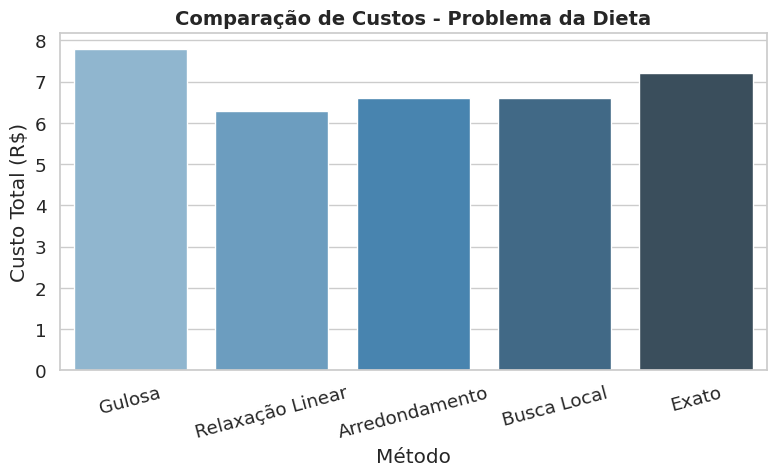

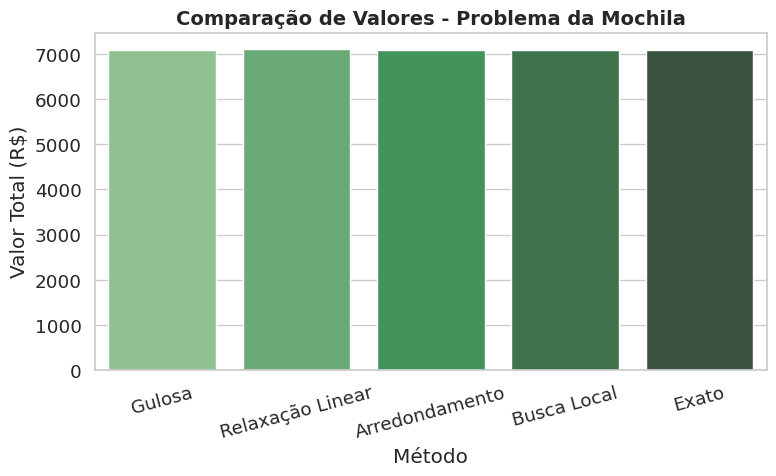

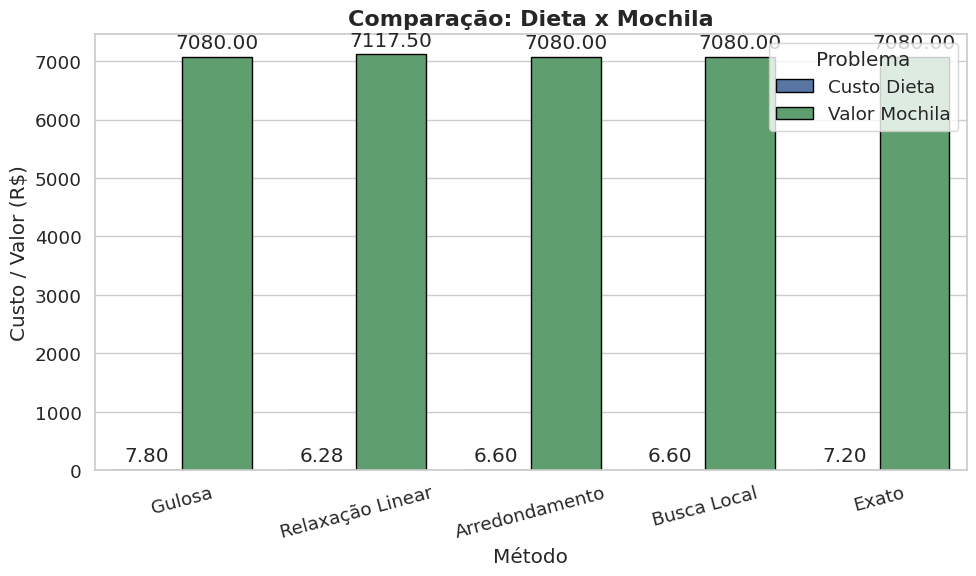

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.2)

plt.figure(figsize=(8, 5))
sns.barplot(
    x='Método Dieta',
    y='Custo Dieta',
    hue='Método Dieta',
    data=df_dieta,
    palette='Blues_d',
    legend=False
)
plt.title('Comparação de Custos - Problema da Dieta', fontsize=14, weight='bold')
plt.ylabel('Custo Total (R$)')
plt.xlabel('Método')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(
    x='Método Mochila',
    y='Valor Mochila',
    hue='Método Mochila',
    data=df_mochila,
    palette='Greens_d',
    legend=False
)
plt.title('Comparação de Valores - Problema da Mochila', fontsize=14, weight='bold')
plt.ylabel('Valor Total (R$)')
plt.xlabel('Método')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

df_plot = df_comparativo.copy()

df_plot.columns = ["Método Dieta", "Custo Dieta", "Método Mochila", "Valor Mochila"]

df_plot["Método"] = df_plot["Método Dieta"]

df_long = pd.melt(
    df_plot,
    id_vars=["Método"],
    value_vars=["Custo Dieta", "Valor Mochila"],
    var_name="Problema",
    value_name="Valor"
)

sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(10,6))

ax = sns.barplot(
    data=df_long,
    x="Método",
    y="Valor",
    hue="Problema",
    palette=["#4C72B0", "#55A868"],
    edgecolor="black"
)

plt.title("Comparação: Dieta x Mochila", fontsize=16, weight="bold")
plt.ylabel("Custo / Valor (R$)")
plt.xlabel("Método")
plt.xticks(rotation=15)
plt.legend(title="Problema", loc="upper right")

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3)

plt.tight_layout()
plt.show()

